In [750]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.animation import FFMpegWriter


In [751]:
writer = FFMpegWriter(fps=10, bitrate=1800)

In [752]:
class Line:
    def __init__(self, a=np.random.rand()*2 - 1, b=np.random.rand()*2 - 1):
        self.a = a
        self.b = b
    
    def get_value(self, x):
        return self.a * x + self.b

class LinearRegression:
    @staticmethod
    def compute_mse(data, line: Line):
        mse = 0
        for (x, y) in data:
            mse += (y - line.get_value(x))**2
        mse /= len(data)
        return mse

    def partial_derivative_a(self, data, line: Line):
        result = 0
        for (x, y) in data:
            result += x * (y - line.get_value(x))
        result = result * (-2) / len(data)
        return result

    def partial_derivative_b(self, data, line: Line):
        result = 0
        for (x, y) in data:
            result += y - line.get_value(x)
        result = result * (-2) / len(data)
        return result

    def gradient_descent_step(self, data, line: Line, learning_rate: float):
        new_line = Line(a=line.a, b=line.b)
        new_line.a = line.a - learning_rate * self.partial_derivative_a(data, line)
        new_line.b = new_line.b - learning_rate * self.partial_derivative_b(data, new_line)
        return new_line

    def fit(self, data, learning_rate:float=0.001, iterations:int=1000):
        line = Line()
        line_history = [line]
        for i in range(iterations):
            line = self.gradient_descent_step(data, line, learning_rate)
            line_history.append(line)
        return line, line_history
    

In [753]:
def generate_dataset():
    line=Line(10 * np.random.random() - 5, 10 * np.random.random() - 5)
    x = np.linspace(-10, 10, 50)
    y = [line.get_value(i)+(16 * np.random.random() - 8) for i in x]
    dataset = np.column_stack((x, y))
    return dataset

In [754]:
class Presenter:
    @staticmethod
    def plot_mse_change(line_histories, data, colors, labels):
        y = np.array([[LinearRegression.compute_mse(data, line) for line in line_history] for line_history in line_histories])
        x = np.arange(y.shape[1])
        plt.figure(figsize=(10, 6))
        plt.grid(True)
        for y_i, color, label in zip(y, colors, labels):
            plt.plot(x, y_i, color=color, label=label)
        plt.xlabel('Iterations')
        plt.ylabel('MSE Error')
        plt.title('MSE Change by different α')
        plt.legend()
        plt.show()



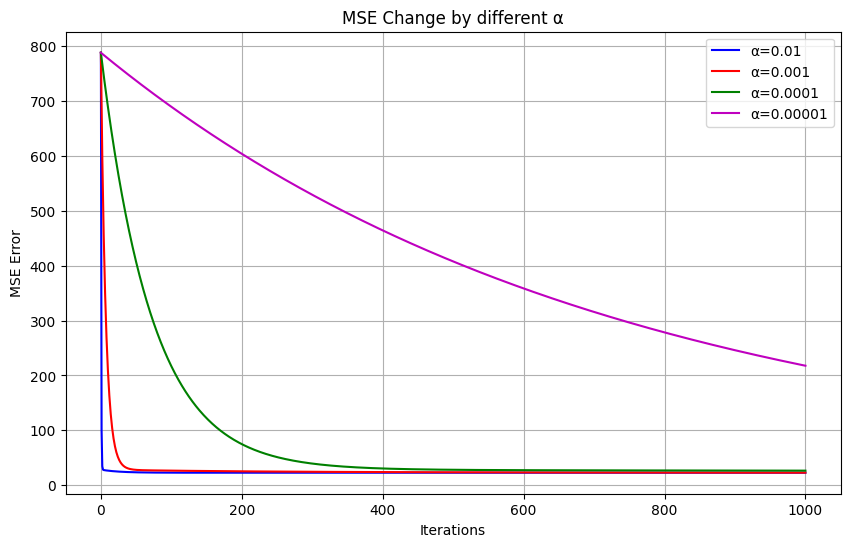

In [755]:
%matplotlib inline
lr = LinearRegression()
data = generate_dataset()
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
line_histories = [lr.fit(data, learning_rate)[1] for learning_rate in learning_rates]
colors = ['b', 'r', 'g', 'm']  # Blue, Red, Green, Magenta
labels=[f'α={learning_rate:.7f}'.rstrip('0') for learning_rate in learning_rates]
Presenter.plot_mse_change(line_histories, data, colors=colors, labels=labels)
plt.show()

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Linear Regression Animation')
dataset = generate_dataset()
x, y = dataset[:, 0], dataset[:, 1]
ax.scatter(x, y, label='Data points')

num_iterations = 50
lr = LinearRegression()
_, line_history = lr.fit(data=dataset, iterations=num_iterations)

prediction = line_history[0].get_value(x)
(line,) = ax.plot(x, prediction, label='Regression line')
ax.legend()

def update(frame):
    hist_line = line_history[frame]
    prediction = hist_line.get_value(x)
    line.set_ydata(prediction)

    ax.set_title(f'Iteration: {frame+1}, a: {hist_line.a:.4f}, b: {hist_line.b:.4f}')

    return (line,)

anim = FuncAnimation(
    fig,
    update,
    frames=num_iterations,
    interval=100,
    blit=True,
    repeat=False
)
anim.save('linear_regression_animation.gif', writer=writer)

HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>